In [2]:
# -*- coding: utf-8 -*-
# import
import receiving_n_transforming_data as rtd
import dimensionality_reduction as drf
import classification as cls
print(rtd.func_list__)

['train_test_split', 'classification_report', 'confusion_matrix', 'accuracy_score', 'read_data_xlsx', 'lemmatize', 'del_stop_words', 'document_term_matrix', 'choce_from_data', 'reshape_testdata']


In [3]:
data = rtd.read_data_xlsx("data.xlsx")
name_tf_idf, annotation_tf_idf, labels = rtd.choce_from_data(data=data, tf_idf=True)     # Получение tf-idf матрицы для названий и аннотаций
# name_tf_idf, annotation_tf_idf    - списки [матрица документ-термин, термины]
# name_tf_idf = name_tf_idf[0]
# annotation_tf_idf = annotation_tf_idf[0]

In [4]:
# Проверяем сбалансированность выборки
print("Количество текстов по теме ИАД", labels.count(True))
print("Количество текстов по теме не ИАД", labels.count(False))

Количество текстов по теме ИАД 1583
Количество текстов по теме не ИАД 1836


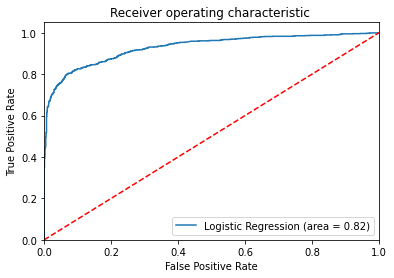

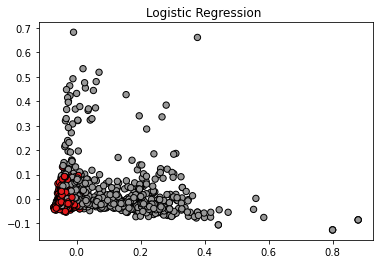

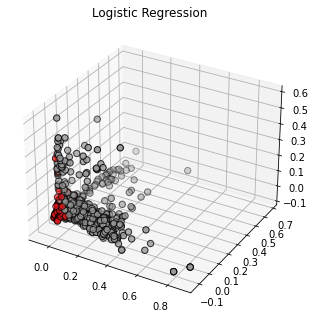

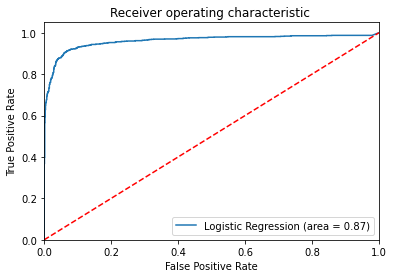

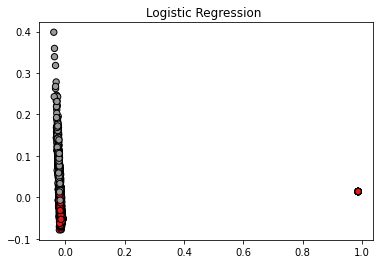

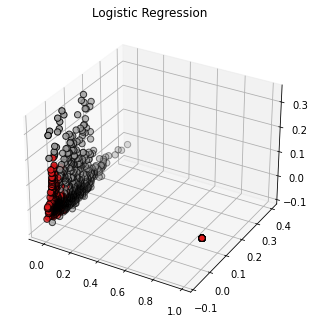

In [4]:
from sklearn.model_selection import train_test_split

file = open("Классификация без удаления малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

In [62]:
# Получение сокращенных матриц без файлов
df_name_tf_idf_short = drf.dimensionality_reduction_func(name_tf_idf)
df_annotation_tf_idf_short = drf.dimensionality_reduction_func(annotation_tf_idf)
name_tf_idf_short, terms_by_name = drf.df_to_list(df_name_tf_idf_short)
annotation_tf_idf_short, terms_by_annatation = drf.df_to_list(df_annotation_tf_idf_short)
# del df_name_tf_idf_short, df_annotation_tf_idf_short

In [4]:
# Получение матриц сокращенной размерности и терминов к матрицам ищ файлов
name_tf_idf_short, terms_by_name_short = drf.read_dimData_fromFiles(tf_idf_file="name_tf_idf_short.txt", terms_file="terms_by_name_short.txt")
annotation_tf_idf_short, terms_by_annatation_short = drf.read_dimData_fromFiles(tf_idf_file="annotation_tf_idf_short.txt", terms_file="terms_by_annatation_short.txt")

In [5]:
# Распределение данных на тренировочные и тестовые, сохранение их в файл
from sklearn.model_selection import train_test_split

x_train_N, x_test_N, y_train_N, y_test_N = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)

file_testData = open("Тестовая выборка NAME.txt", 'w', encoding='utf-8')
[file_testData.write(str(x_test_N[i]) + '\n') for i in range(len(x_test_N))]
file_testData.close()

file_testData = open("Тестовая выборка ANNOTATION.txt", 'w', encoding='utf-8')
[file_testData.write(str(x_test_A[i]) + '\n') for i in range(len(x_test_A))]
file_testData.close()


file_testData = open("Тестовая выборка исходные метки NAME.txt", 'w', encoding='utf-8')
[file_testData.write(str(y_test_N[i]) + ' ') for i in range(len(y_test_N))]
file_testData.close()

file_testData = open("Тестовая выборка исходные метки ANNOTATION.txt", 'w', encoding='utf-8')
[file_testData.write(str(y_test_A[i]) + ' ') for i in range(len(y_test_A))]
file_testData.close()

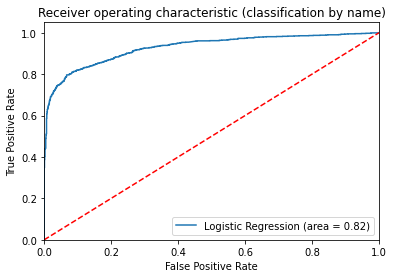

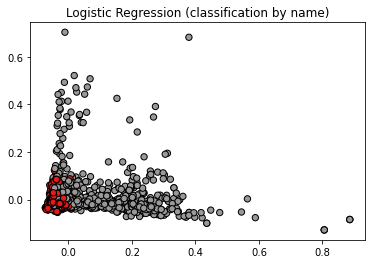

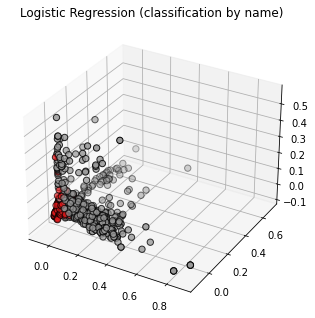

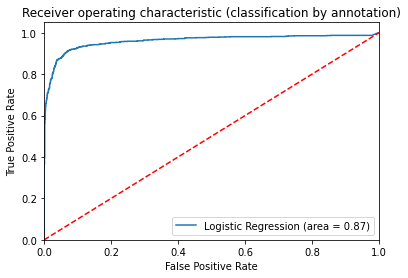

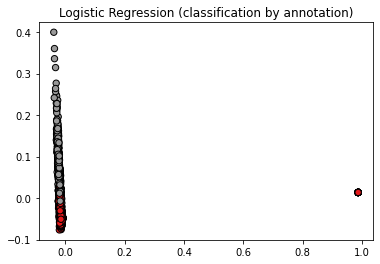

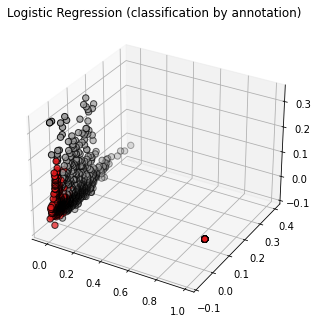

In [36]:
# Классификация c логистической регрессией с удалением малозначимых терминов// с графиками

file = open("Классификация с логистической регрессией удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки логистической регрессии.txt", 'w', encoding='utf-8')

test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')


test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

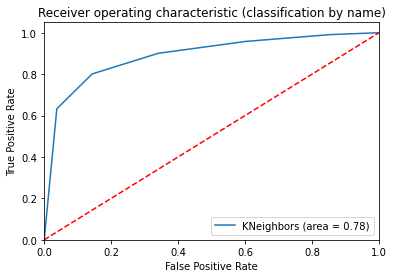

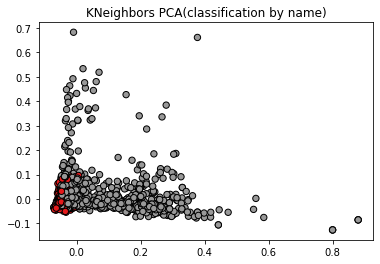

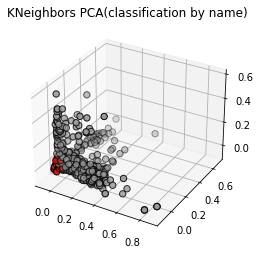

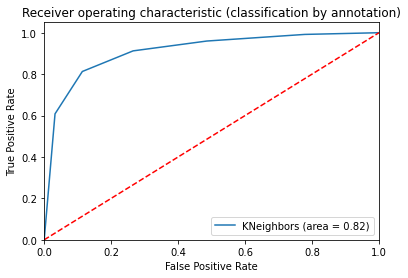

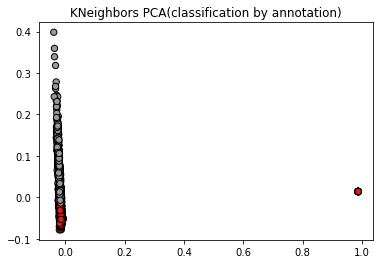

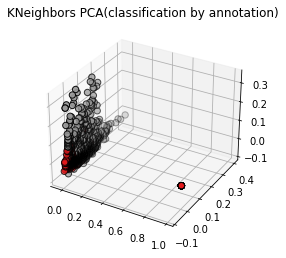

In [24]:
# Классификация c КБС БЕЗ удаления малозначимых терминов// с графиками
from sklearn.model_selection import train_test_split
file = open("Классификация КБС БЕЗ удаления малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки КБС без удаления терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train, x_test, y_train, y_test, "(classification by name)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train, x_test, y_train, y_test, "(classification by annotation)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

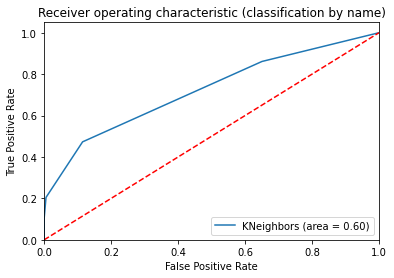

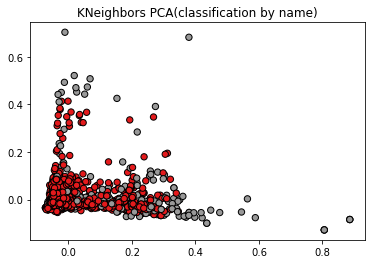

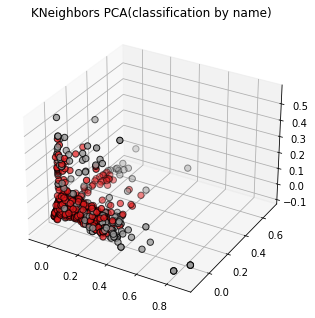

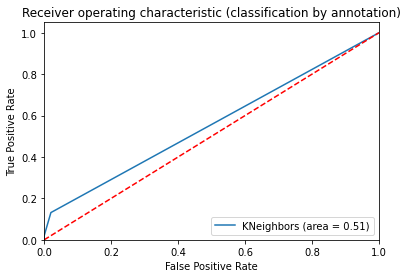

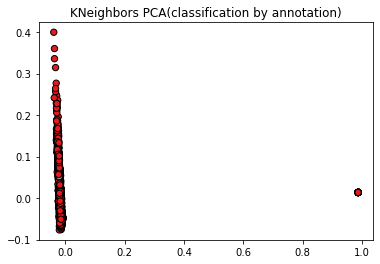

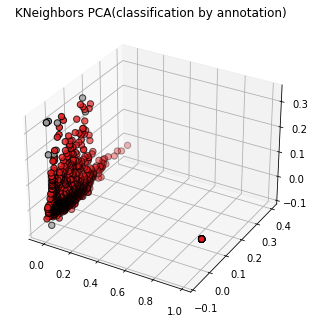

In [38]:
# Классификация c КБС с удалением малозначимых терминов// с графиками

file = open("Классификация КБС с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки КБС.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')

test_pred, classificationReport, confusionMatrix, accuracy = cls.k_nearest_neighbors(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
import time

In [31]:
def random_tree_param(X_train, X_test, y_train, y_test, label='',
                        criterion="gini",
                        max_depth=200,
                        max_features=90):
    """Классификация с помощью дерева решений"""

    start_time = time.time()

    # model = DecisionTreeClassifier(criterion=criterion,
    #                       max_depth=max_depth,
    #                       max_features=max_features)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_proba = model.predict(X_test)

    cls.pca(X_test, y_proba, title='Decision Tree Classifier ' + label)

    print("Decision Tree for " + label, (time.time() - start_time)//60, "min", (time.time() - start_time)%60, "sec")
    
    return y_proba, classification_report(y_test, y_proba), confusion_matrix(y_test, y_proba), accuracy_score(y_test, y_proba)

Decision Tree for (classification by name) 0.0 min 2.2449951171875 sec
Decision Tree for (classification by annotation) 0.0 min 11.41551423072815 sec


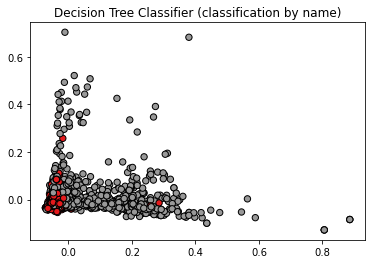

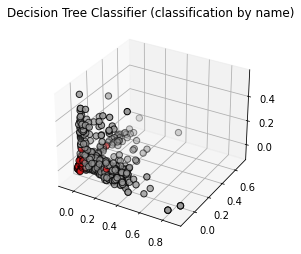

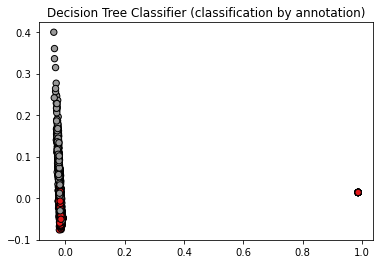

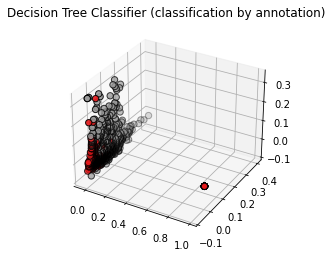

In [32]:
# Классификация random tree с удалением малозначимых терминов// с графиками

file = open("Классификация random tree с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки random tree.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = random_tree_param(X_train=x_train_N, X_test=x_test_N, y_train=y_train_N, y_test=y_test_N, label="(classification by name)",
criterion='entropy', max_depth=160, max_features=70)
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')

test_pred, classificationReport, confusionMatrix, accuracy = random_tree_param(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)",
criterion='gini', max_depth=200, max_features=90)
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

In [17]:
def random_forest_(X_train, X_test, y_train, y_test, label=''):
    """Классификация с помощью случайного леса"""
    model = RandomForestClassifier()

    start_time = time.time()

    model.fit(X_train, y_train)
    y_proba = model.predict(X_test)
    
    cls.pca(X_test, y_proba, title='Random Forest Classifier ' + label)

    print("Random Forest for " + label, (time.time() - start_time)//60, "min", (time.time() - start_time)%60, "sec")

    return y_proba, classification_report(y_test, y_proba), confusion_matrix(y_test, y_proba), accuracy_score(y_test, y_proba)

Random Forest for (classification by name) 0.0 min 5.796499729156494 sec
Random Forest for (classification by annotation) 0.0 min 19.231574773788452 sec


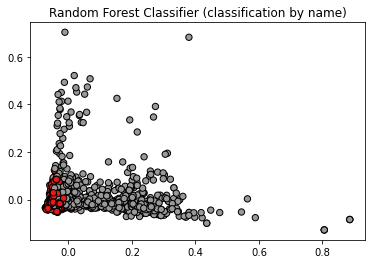

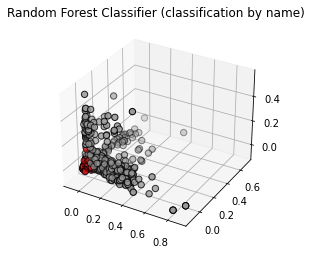

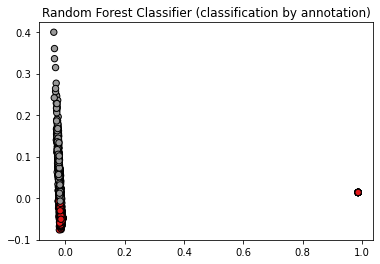

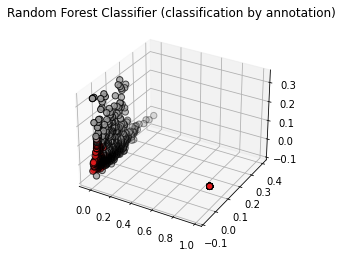

In [19]:
# Классификация random forest с удалением малозначимых терминов// с графиками

file = open("Классификация random forest с удалением малозначимых терминов.txt", 'w', encoding='utf-8')

file_predict = open("Метки random forest.txt", 'w', encoding='utf-8')

test_pred, classificationReport, confusionMatrix, accuracy = random_forest_(x_train_N, x_test_N, y_train_N, y_test_N, "(classification by name)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]
file_predict.write('\n')

test_pred, classificationReport, confusionMatrix, accuracy = random_forest_(x_train_A, x_test_A, y_train_A, y_test_A, "(classification by annotation)")
file.write("Результаты классификации:\n" + "Точность:\n" + str(accuracy) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))
test_pred = list(map(int, test_pred))
[file_predict.write(str(test_pred[i]) + ' ') for i in range(len(test_pred))]

file.close()
file_predict.close()

In [16]:
def search_parameters_KNN(X_train, X_test, Y_train, Y_test):
    model = GridSearchCV(KNeighborsClassifier(),
        {'n_neighbors': list(range(2, 6)), 'weights': ['uniform', 'distance']}, n_jobs=3, cv=5)
    print("Обучение модели")
    model.fit(X_train, Y_train)
    print('Best_params KNN')
    print(model.best_params_)
    print('Report')
    print(classification_report(Y_test, model.predict(X_test)))
    model2 = GridSearchCV(LogisticRegression(),
                        {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                         'penalty': ['l1', 'l2'],
                         'C': [i / 10 for i in range(1,15)]},
                         n_jobs=3, cv=5)
    print('Обучение модели')
    model2.fit(X_train, Y_train)
    print('Best params Logistic Regression')
    print(model2.best_params_)
    print('Report')
    print(classification_report(Y_test, model.predict(X_test)))

In [14]:
search_parameters_KNN(x_train_N, x_test_N, y_train_N, y_test_N)

Обучение модели
Best_params KNN
{'n_neighbors': 2, 'weights': 'distance'}
Report
              precision    recall  f1-score   support

       False       0.70      0.97      0.81      1299
        True       0.93      0.51      0.66      1095

    accuracy                           0.76      2394
   macro avg       0.82      0.74      0.74      2394
weighted avg       0.81      0.76      0.74      2394

Обучение модели


c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueE

Best params Logistic Regression
{'C': 1.4, 'penalty': 'l2', 'solver': 'newton-cg'}
Report
              precision    recall  f1-score   support

       False       0.70      0.97      0.81      1299
        True       0.93      0.51      0.66      1095

    accuracy                           0.76      2394
   macro avg       0.82      0.74      0.74      2394
weighted avg       0.81      0.76      0.74      2394



In [20]:
search_parameters_KNN(x_train_A, x_test_A, y_train_A, y_test_A)

Обучение модели
Best_params KNN
{'n_neighbors': 4, 'weights': 'distance'}
Report
              precision    recall  f1-score   support

       False       0.56      1.00      0.72      1299
        True       1.00      0.05      0.10      1095

    accuracy                           0.57      2394
   macro avg       0.78      0.53      0.41      2394
weighted avg       0.76      0.57      0.44      2394

Обучение модели


c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueE

Best params Logistic Regression
{'C': 1.4, 'penalty': 'l2', 'solver': 'liblinear'}
Report
              precision    recall  f1-score   support

       False       0.56      1.00      0.72      1299
        True       1.00      0.05      0.10      1095

    accuracy                           0.57      2394
   macro avg       0.78      0.53      0.41      2394
weighted avg       0.76      0.57      0.44      2394



In [34]:
report = """              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1299
        True       0.82      0.84      0.83      1095

    accuracy                           0.84      2394
   macro avg       0.84      0.84      0.84      2394
weighted avg       0.84      0.84      0.84      2394"""



In [35]:
cls.autoTable(report, "rand tree ")